# Analisi di serie temporali sull'andamento della camminata

## Descrizione :

I file che hanno :

- *_P_* sono il cammino sulle punte, 
- *_N_* sono per il cammino normale
- *_TP_* sono per tacco-punta. 
     
Ciascun file csv è una matrice Nx75.
N è il numero di campioni (frame del video). 

Nelle colonne ci sono in ordine x |y| likelihood ( dove la likelihood è un numero tra 0 e 1 che esprime quanto siamo sicuri di aver trovato il giunto nella posizione giusta) 
di ogni giunto trovato sul piano immagine (per un totale di 25 punti).

L'ordine dei punti è il seguente: 0.naso, 1.torace, 2.spalla dx, 3.gomito dx, 4.polso dx, 5.spalla sx, 6.gomito sx, 7.polso sx, 8.cresta iliaca, 9.anca dx, 10.ginocchio dx, 11.caviglia dx, 12.anca sx, 13.ginocchio sx, 14.caviglia sx, 15.occhio dx, 16.occhio sx, 17.zigomo dx, 18.zigomo sx, 19,20,21.piede sx, 22,23,24.piede dx.

Qundi avrete come prima colonna la x del naso, seconda colonna la y del naso e cosi via. 

La likelihood è un numero tra 0 e 1 che esprime quanto siamo sicuri di aver trovato il giunto nella posizione giusta questa informazione interessa fino ad un certo punto percio potete non considerare le colonne multipli di 3 e via.
Come dicevamo i giunti più importanti saranno quelli sulle gambe e il polso. Vi consiglio di plottare la x del naso come prima cosa per capire un pochino di che cosa si parla.
Come dicevamo i dati non sono filtrati e forse un minimo di filtraggio ci sta ma vedete voi. Per qualsiasi cosa se non fossi stato chiaro ci sono per parlarne

In [1]:
# imports 

import pandas as pd
import numpy as np
import tstools.analysis as ts_analysis
import tstools.plot as ts_plot
import tstools.data_manipulation as ts_data
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import math as math
import scipy.fftpack as sft

import sys
sys.path.insert(1, '../../../python_modules')
import helper as helper
import project_analysis as analysis

## Analisi del paziente sano S008 con camminata normale

In [2]:
# read the filtered dataset
dataset_path = '../../datasets/008/S008_N_2-filtered.csv'
dataset = pd.read_csv(dataset_path)

In [3]:
dataset.head()

,Unnamed: 0,x_naso,y_naso,l_naso,x_torace,y_torace,l_torace,x_spalla_dx,y_spalla_dx,l_spalla_dx,...,l_piede_sx_3,x_piede_dx_1,y_piede_dx_1,l_piede_dx_1,x_piede_dx_2,y_piede_dx_2,l_piede_dx_2,x_piede_dx_3,y_piede_dx_3,l_piede_dx_3
0,0,1272.629512,205.883842,0.405137,1299.232568,271.434776,0.127672,1275.432002,268.770481,0.264625,...,0.083010,1124.406084,710.896008,0.702491,1131.439641,705.682420,0.682770,1203.787351,721.650987,0.619305
1,1,1262.238921,207.815270,0.479220,1292.900625,272.231455,0.227296,1266.392760,270.111729,0.338379,...,0.135742,1116.888179,712.464633,0.704283,1122.926560,707.255501,0.683235,1194.049004,721.441739,0.624993
2,2,1251.770569,209.507061,0.549721,1286.246380,272.870563,0.322957,1257.179576,271.293280,0.409105,...,0.188373,1110.101525,714.078933,0.704840,1115.217781,708.848746,0.682685,1185.062558,721.134626,0.630277
3,3,1241.242273,210.793813,0.613778,1279.117582,273.246266,0.411328,1247.751904,272.200215,0.474377,...,0.241518,1104.437453,715.769308,0.703784,1108.758316,710.486006,0.681057,1177.280687,720.727080,0.635296
4,4,1230.665554,211.574146,0.669890,1271.432721,273.291636,0.490575,1238.083474,272.750137,0.533125,...,0.295089,1100.215288,717.498319,0.700168,1103.921521,712.131451,0.677665,1171.043317,720.159286,0.639663


### Analisi

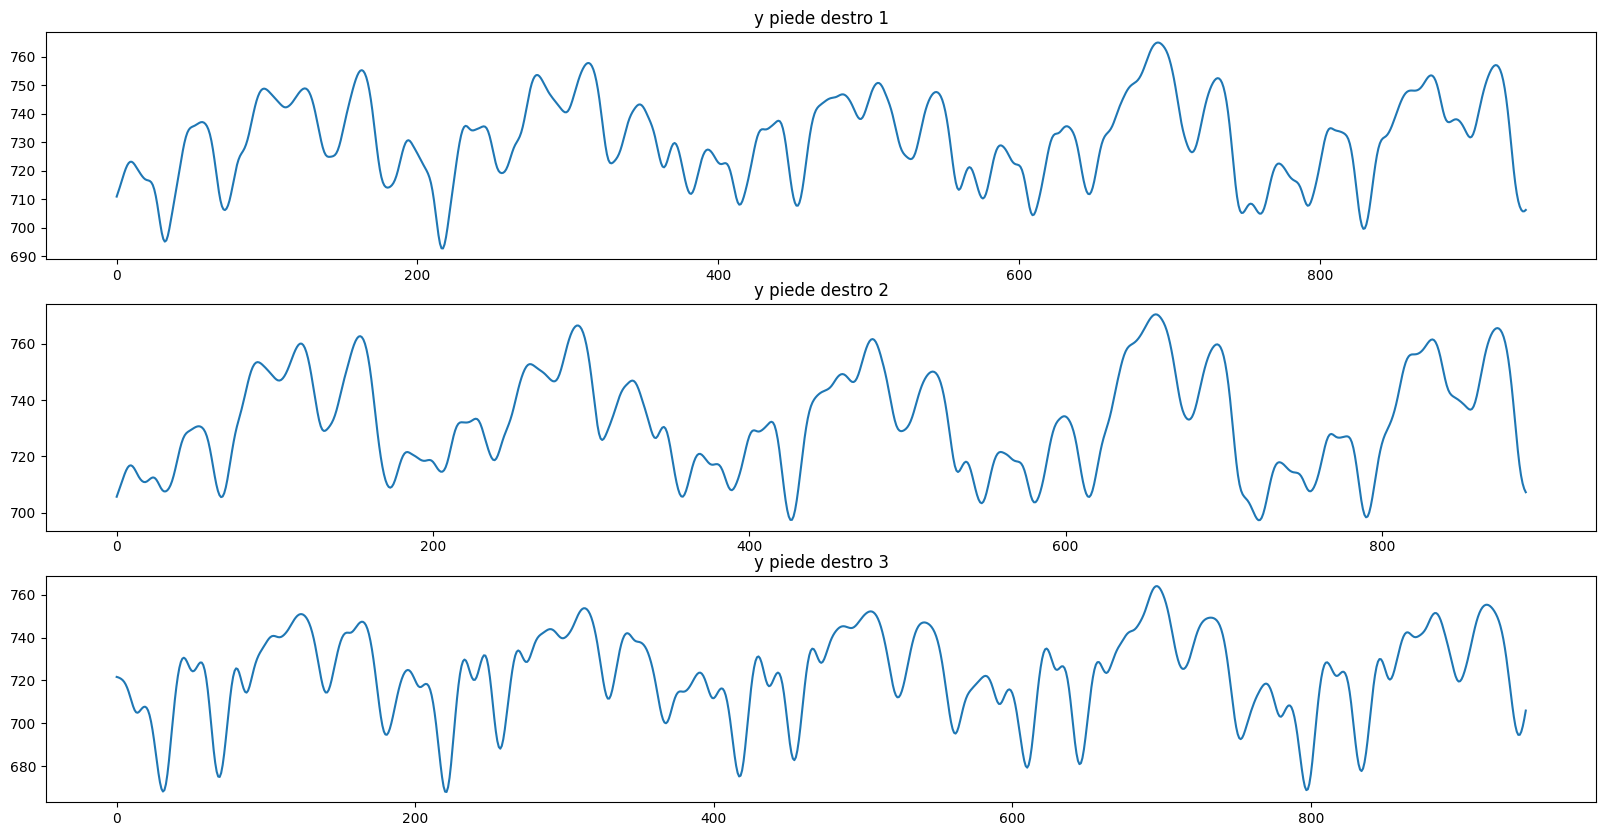

In [4]:
y_piede_dx_1 = helper.delete_nan(dataset.y_piede_dx_1)
y_piede_dx_2 = helper.delete_nan(dataset.y_piede_dx_2)
y_piede_dx_3 = helper.delete_nan(dataset.y_piede_dx_3)

plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
plt.title('y piede destro 1')
plt.plot(y_piede_dx_1)

plt.subplot(3,1,2)
plt.title('y piede destro 2')
plt.plot(y_piede_dx_2)

plt.subplot(3,1,3)
plt.title('y piede destro 3')
plt.plot(y_piede_dx_3)

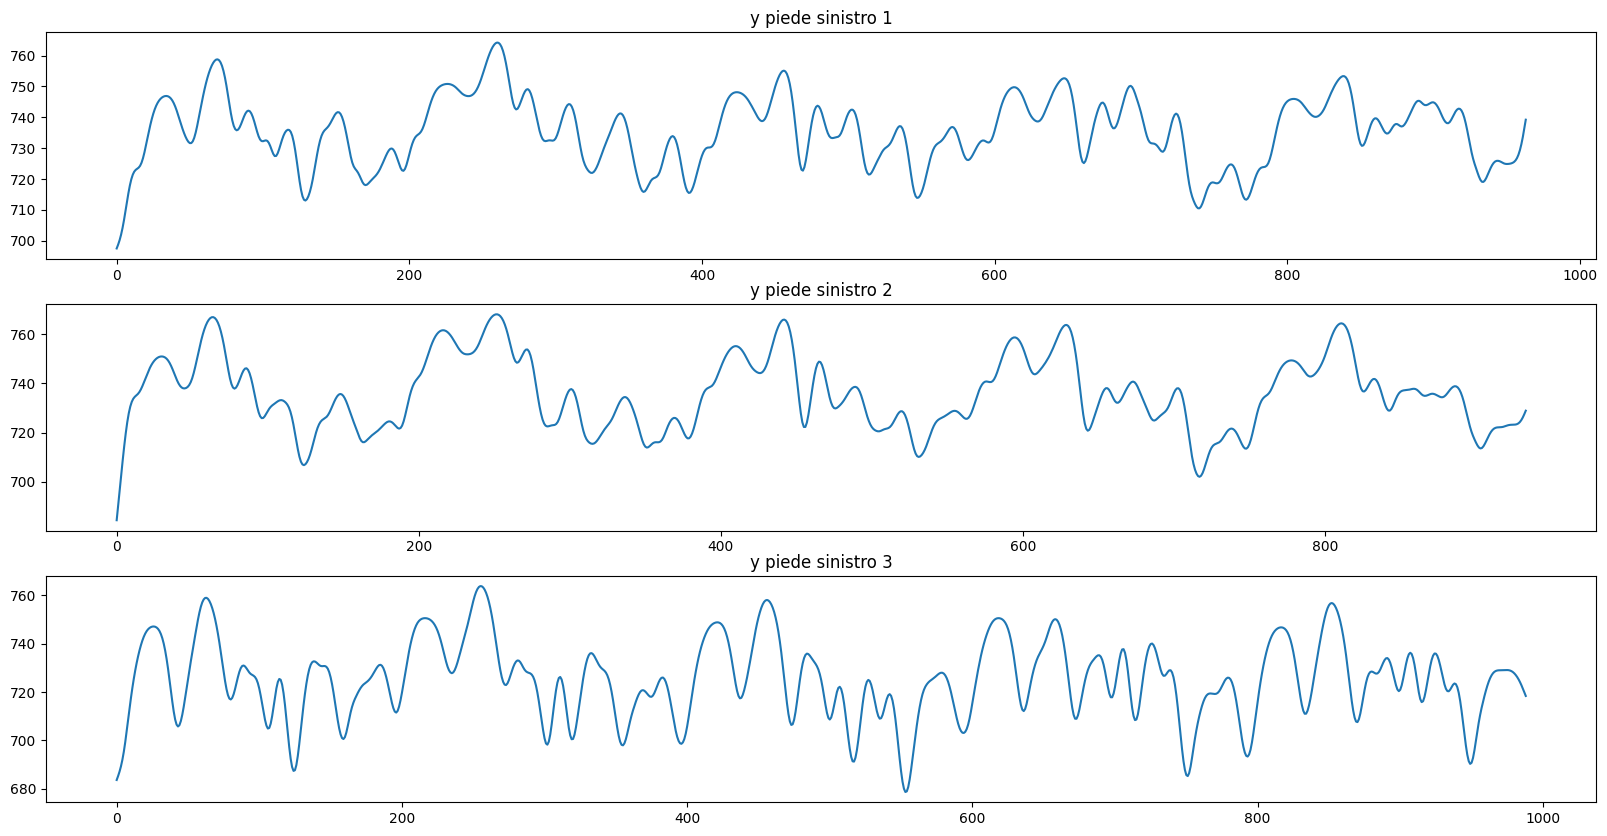

In [5]:
y_piede_sx_1 = helper.delete_nan(dataset.y_piede_sx_1)
y_piede_sx_2 = helper.delete_nan(dataset.y_piede_sx_2)
y_piede_sx_3 = helper.delete_nan(dataset.y_piede_sx_3)

plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
plt.title('y piede sinistro 1')
plt.plot(y_piede_sx_1)

plt.subplot(3,1,2)
plt.title('y piede sinistro 2')
plt.plot(y_piede_sx_2)

plt.subplot(3,1,3)
plt.title('y piede sinistro 3')
plt.plot(y_piede_sx_3)

In [42]:
periods = helper.intspace_(300).tolist()
error, best_period = analysis.best_seasonal_error([y_piede_dx_1, y_piede_dx_2, y_piede_dx_3], periods[40:100])
print('[--] error: {}  |  best period: {}'.format(error, best_period))

[--] error: 2522.155648868834  |  best period: 40


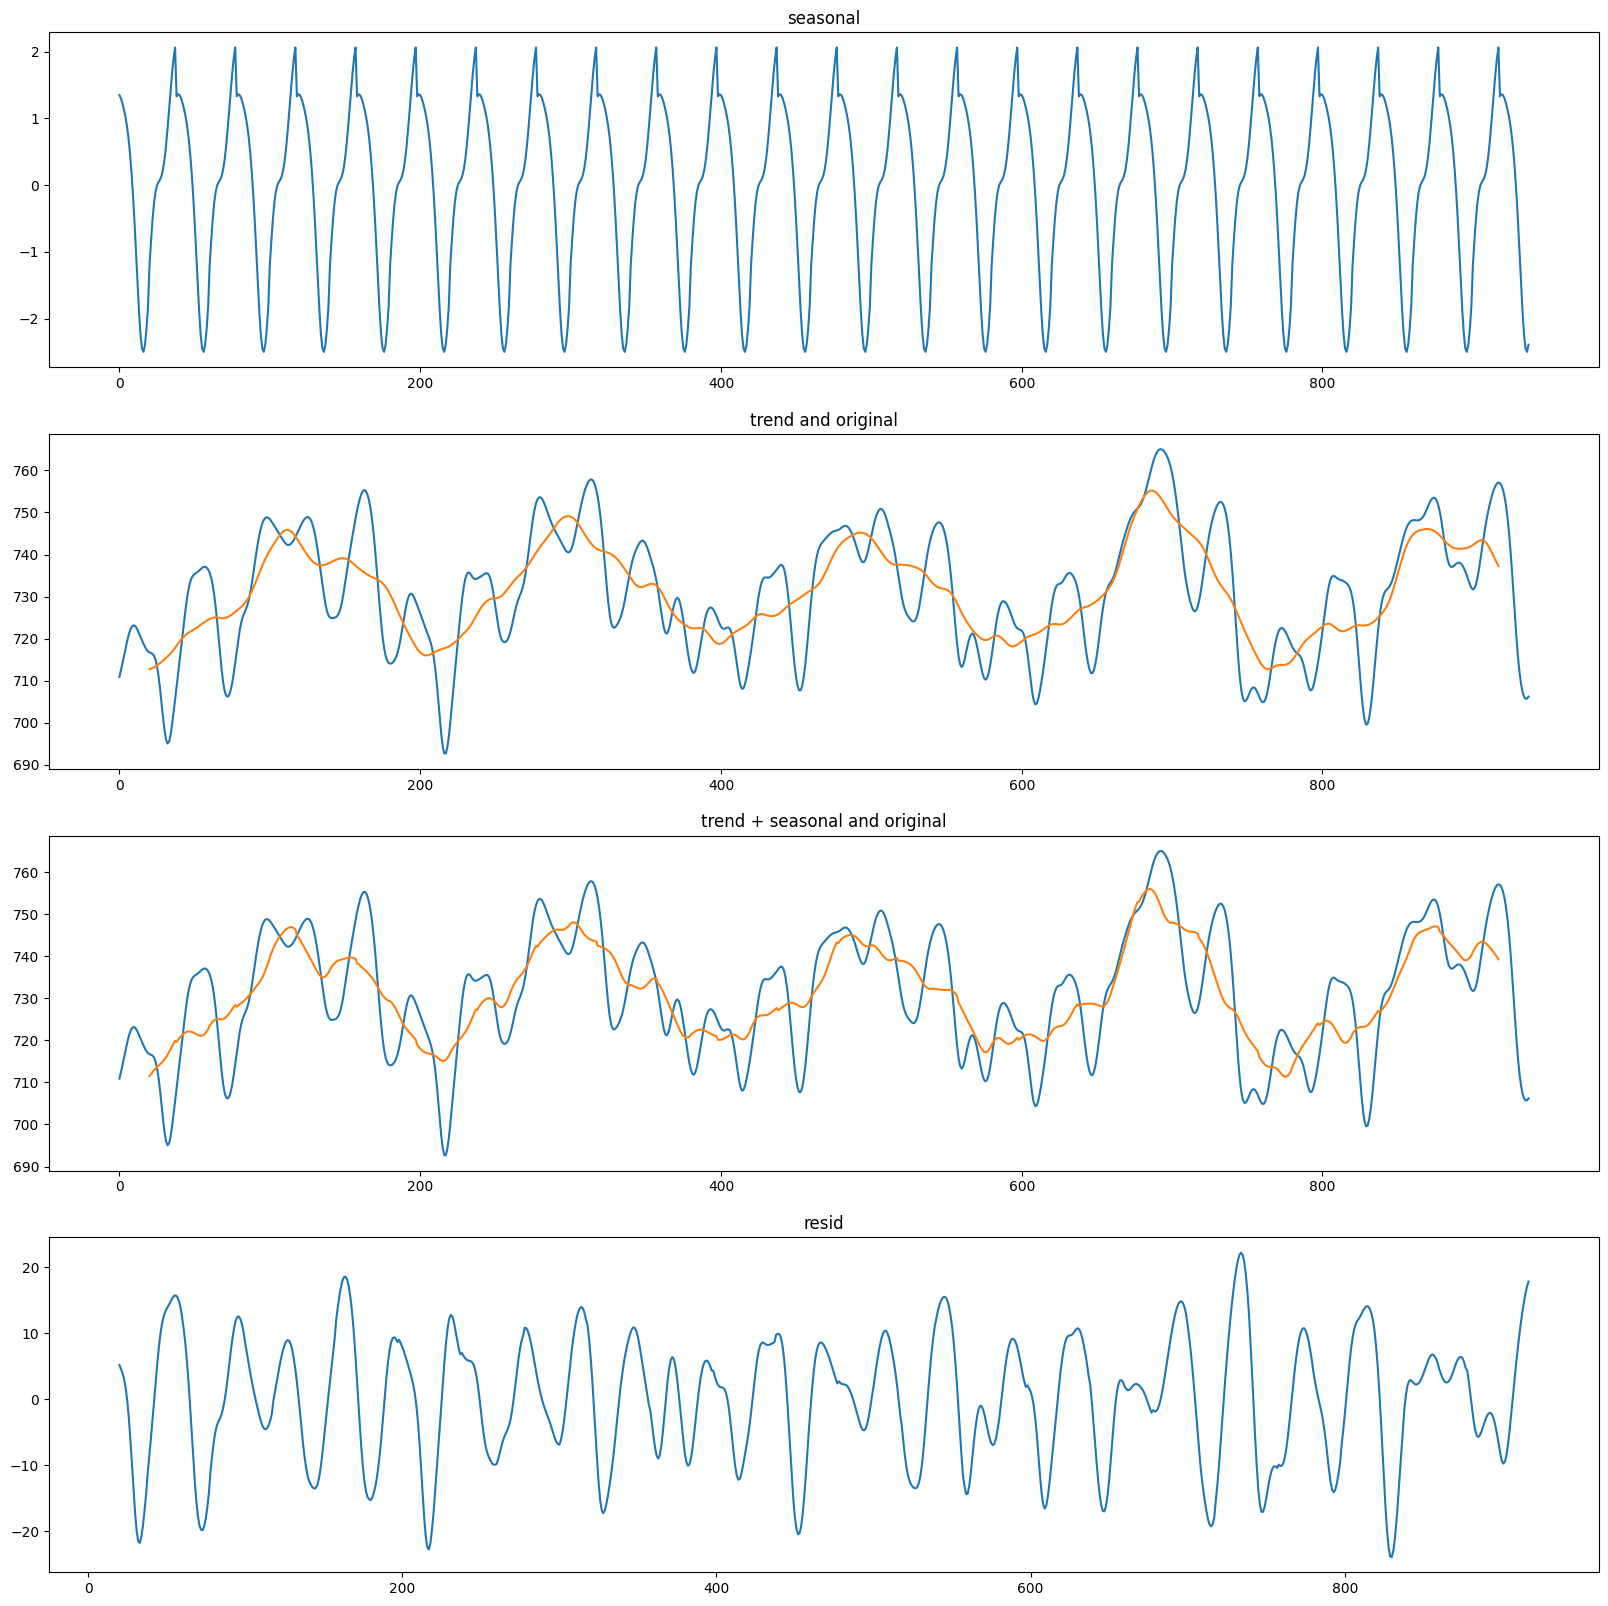

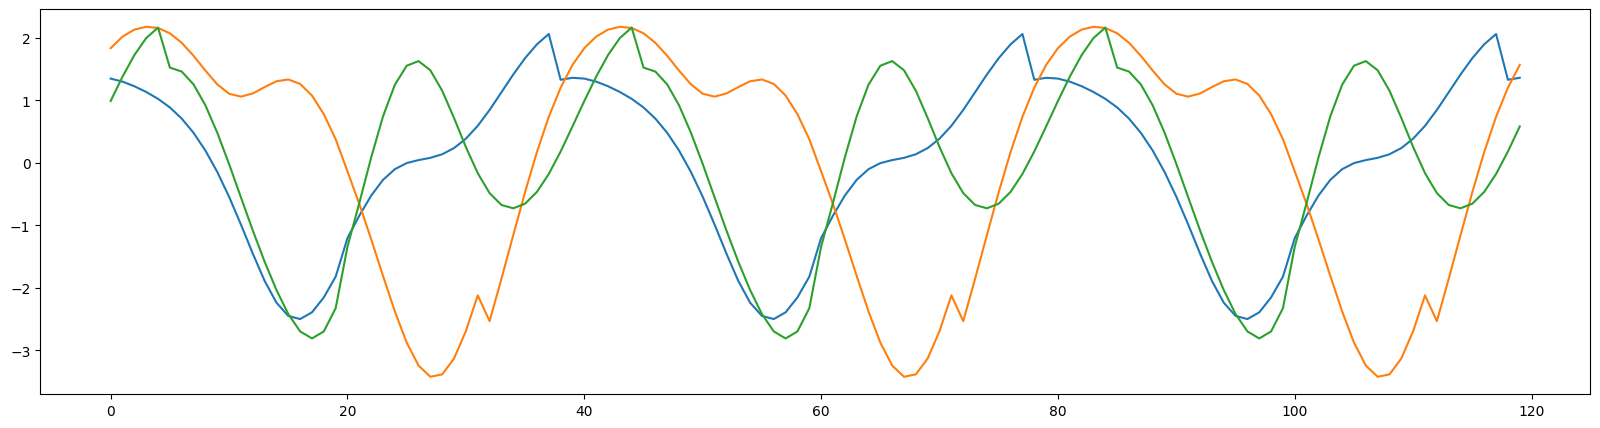

In [43]:
period = best_period
s1 = seasonal_decompose(y_piede_dx_1, period=period).seasonal
s2 = seasonal_decompose(y_piede_dx_2, period=period).seasonal
s3 = seasonal_decompose(y_piede_dx_3, period=period).seasonal

ts_plot.plot_seasonalDecompose(y_piede_dx_1, period)

ts_plot.plot_single([s1[:120], s2[:120], s3[:120]])

In [54]:
error, best_period = analysis.best_seasonal_error([y_piede_sx_1, y_piede_sx_2, y_piede_sx_3], periods[45:100])
print('[--] error: {}  |  best period: {}'.format(error, best_period))

[--] error: 675.8549030762906  |  best period: 45


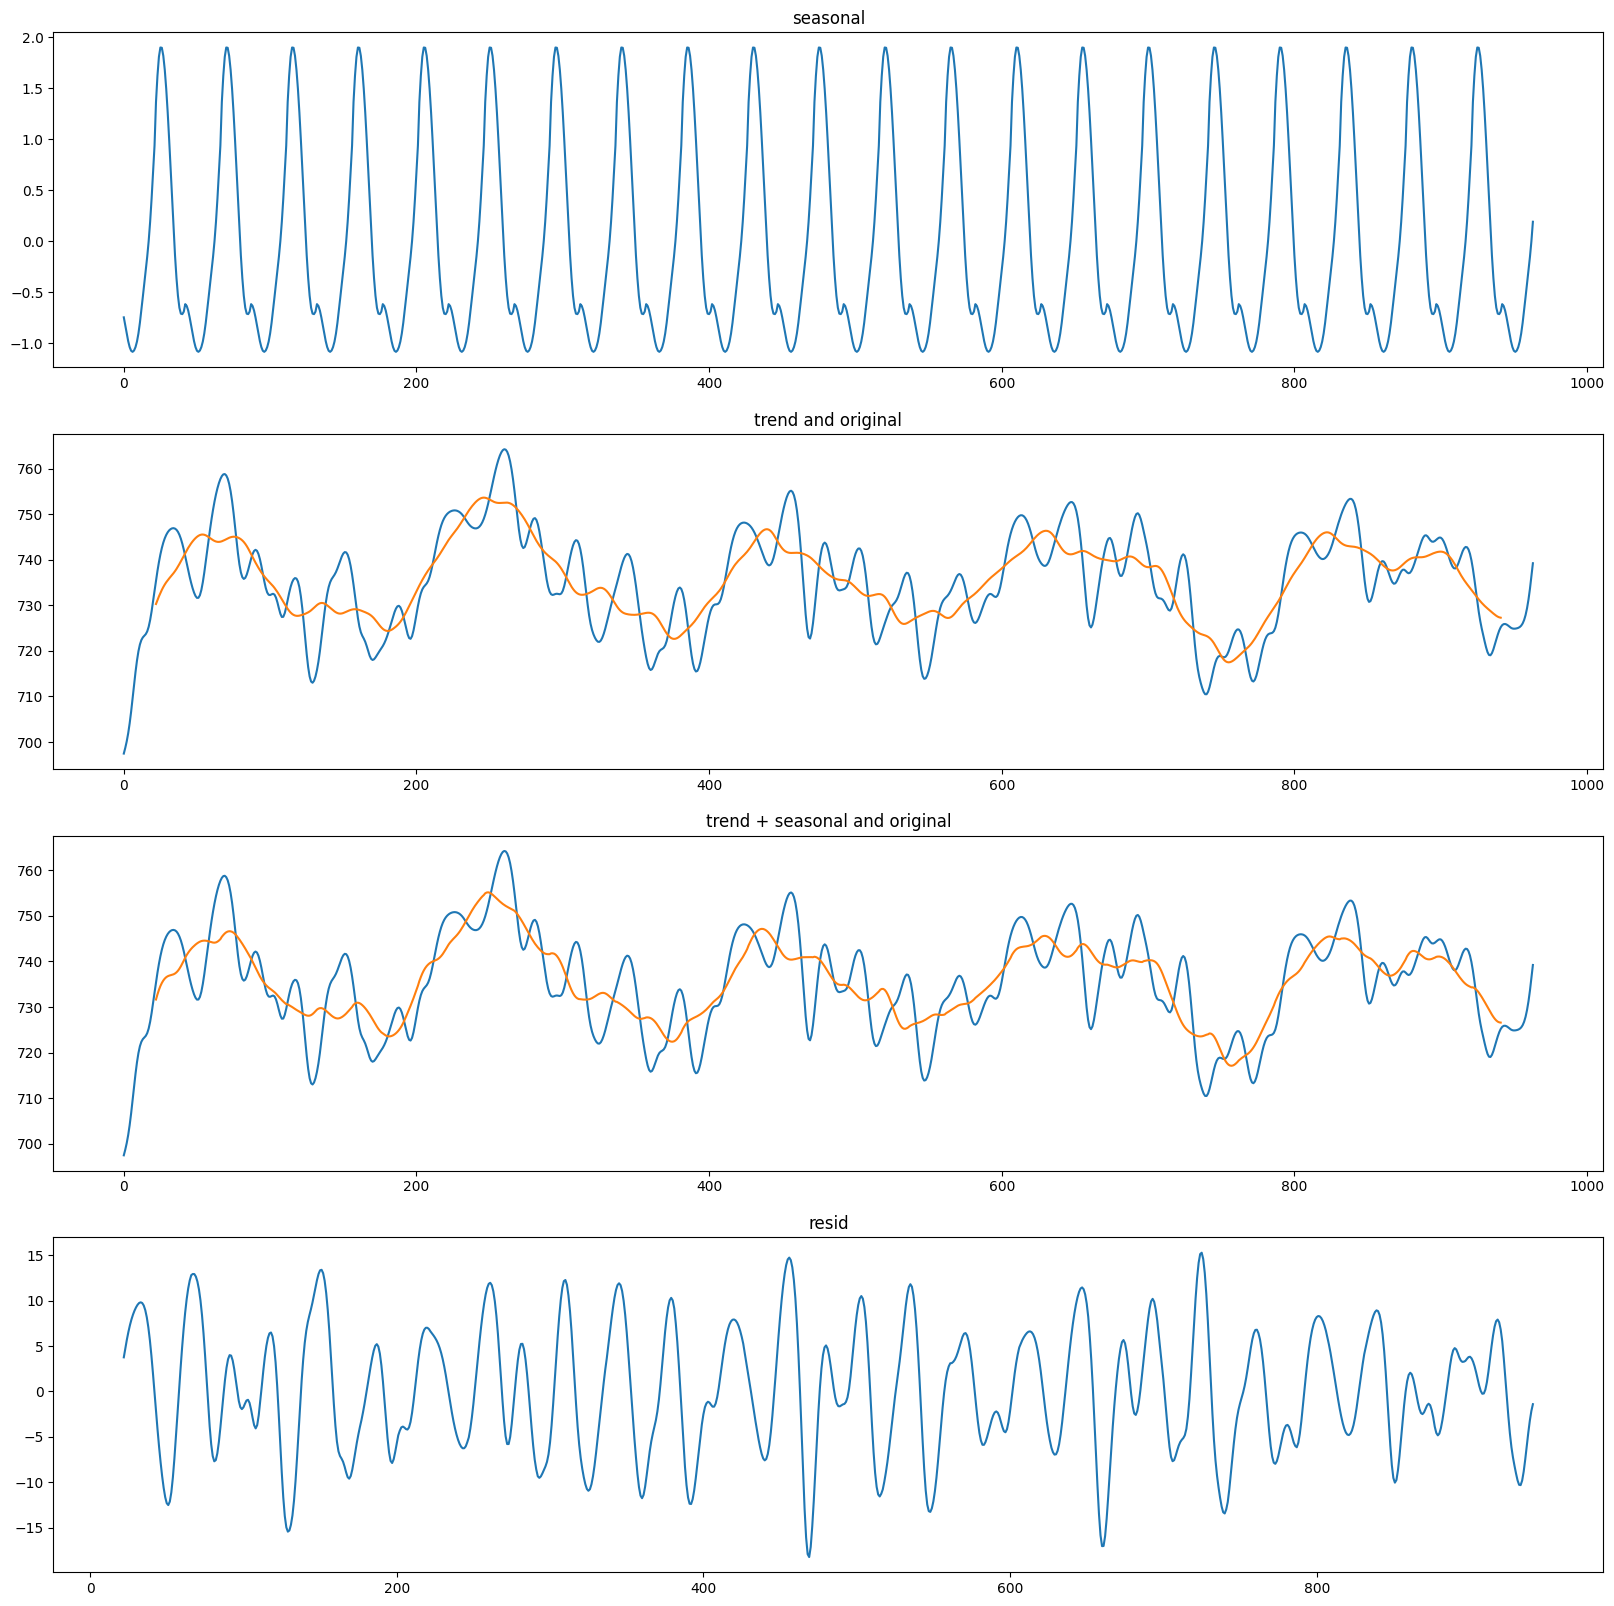

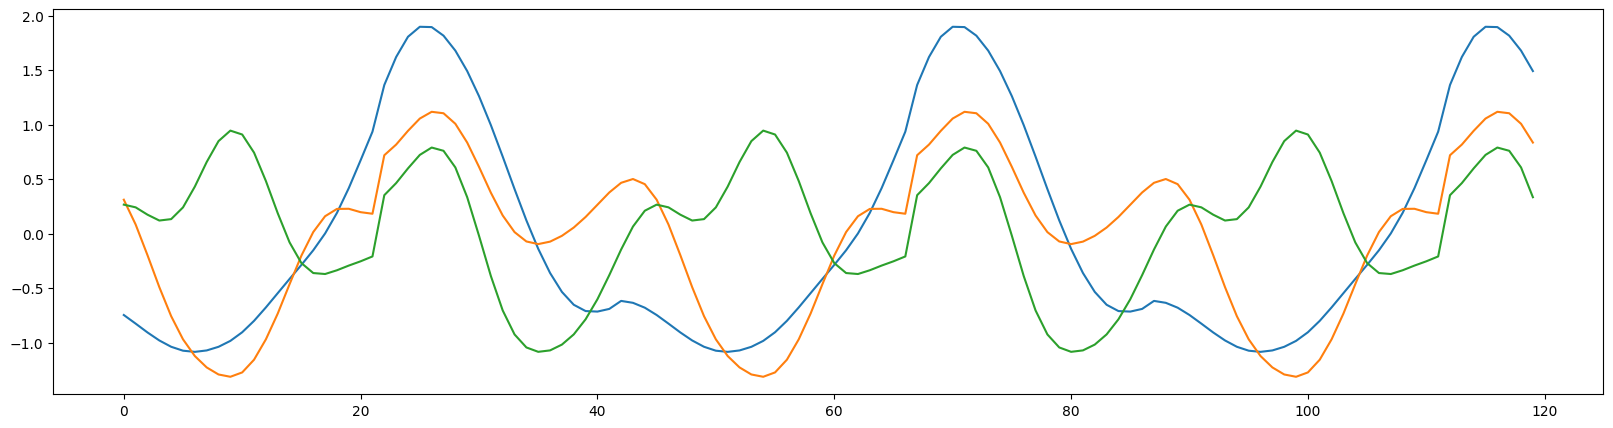

In [55]:
period = best_period
s1 = seasonal_decompose(y_piede_sx_1, period=period).seasonal
s2 = seasonal_decompose(y_piede_sx_2, period=period).seasonal
s3 = seasonal_decompose(y_piede_sx_3, period=period).seasonal

ts_plot.plot_seasonalDecompose(y_piede_sx_1, period)

ts_plot.plot_single([s1[:120], s2[:120], s3[:120]])